<a href="https://colab.research.google.com/github/BerkayKsgn/DSA210-TermProject/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization & Hypothesis Testing

In this notebook, I analyze the relationship between coffee and water consumption, focus duration, and sleep quality.  
I apply exploratory data analysis techniques and perform statistical tests to validate three hypotheses:

1. **Higher coffee intake reduces sleep duration**
2. **Higher water intake increases focus duration**
3. **High sugar intake negatively affects focus duration**

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

##  Load Cleaned Data

In [55]:
df = pd.read_excel("/content/cleaned_focus_sleep_data.xlsx")
df.head()

,Date,Coffee (ml),Caffeine (mg),Water (ml),Sugar (mg),Focus (min),Screen Time (min),Sleep Start,Sleep End,Sleep (hrs),Sleep Quality (%),Last Coffee (hrs before sleep),Temperature (°C),High Coffee,High Water,High Focus,Sleep Start Hour,Sleep End Hour,Early Coffee Cutoff
0,10 Mar,900,225,1234,45,263,294,1:34,8:51,7.09,68,4,14,True,True,True,1,8,True
1,11 Mar,1200,300,1195,60,284,258,0:08,8:09,8.58,73,6,20,True,False,True,0,8,True
2,12 Mar,600,150,1233,30,248,263,1:27,8:28,7.95,67,5,12,False,True,True,1,8,True
3,13 Mar,1200,300,1228,40,240,213,2:05,9:10,7.02,66,3,15,True,True,False,2,9,True
4,14 Mar,600,150,1680,30,182,224,0:44,8:57,8.44,75,3,16,False,True,False,0,8,True


##  Distribution of Coffee and Water Intake

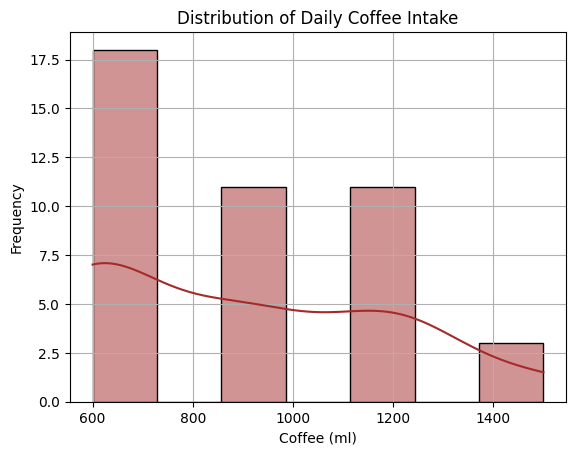

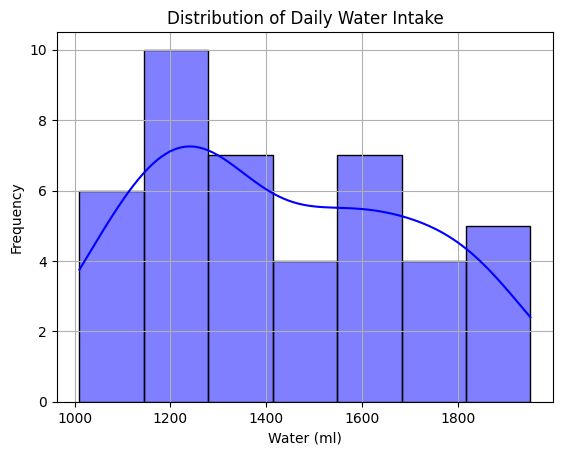

In [5]:
sns.histplot(df["Coffee (ml)"], kde=True, color="brown")
plt.title("Distribution of Daily Coffee Intake")
plt.xlabel("Coffee (ml)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

sns.histplot(df["Water (ml)"], kde=True, color="blue")
plt.title("Distribution of Daily Water Intake")
plt.xlabel("Water (ml)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

##  Distribution of Focus Duration

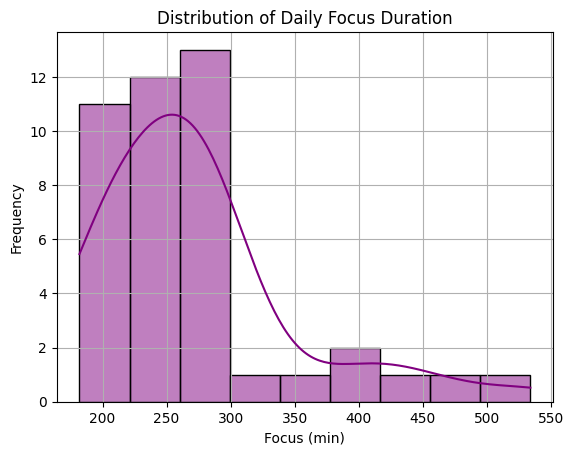

In [6]:
sns.histplot(df["Focus (min)"], kde=True, color="purple")
plt.title("Distribution of Daily Focus Duration")
plt.xlabel("Focus (min)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

##  Focus vs Sleep Over Time

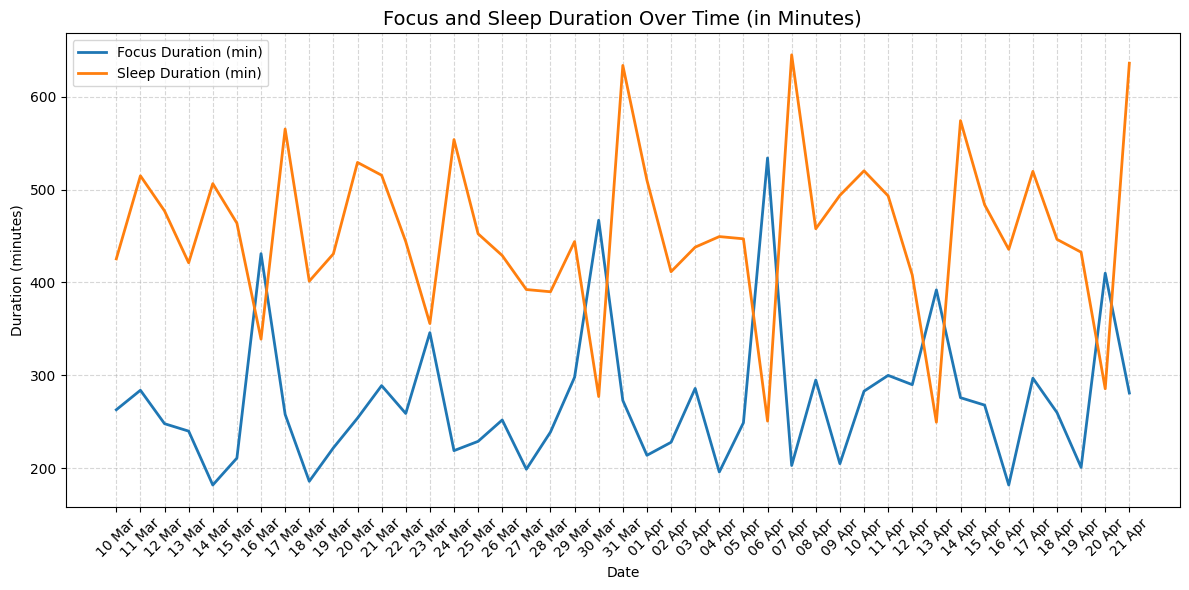

In [18]:
df["Sleep (min)"] = df["Sleep (hrs)"] * 60

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Focus (min)"], label="Focus Duration (min)", color="tab:blue", linewidth=2)
plt.plot(df["Date"], df["Sleep (min)"], label="Sleep Duration (min)", color="tab:orange", linewidth=2)

plt.xlabel("Date")
plt.ylabel("Duration (minutes)")
plt.title("Focus and Sleep Duration Over Time (in Minutes)", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Correlation Matrix

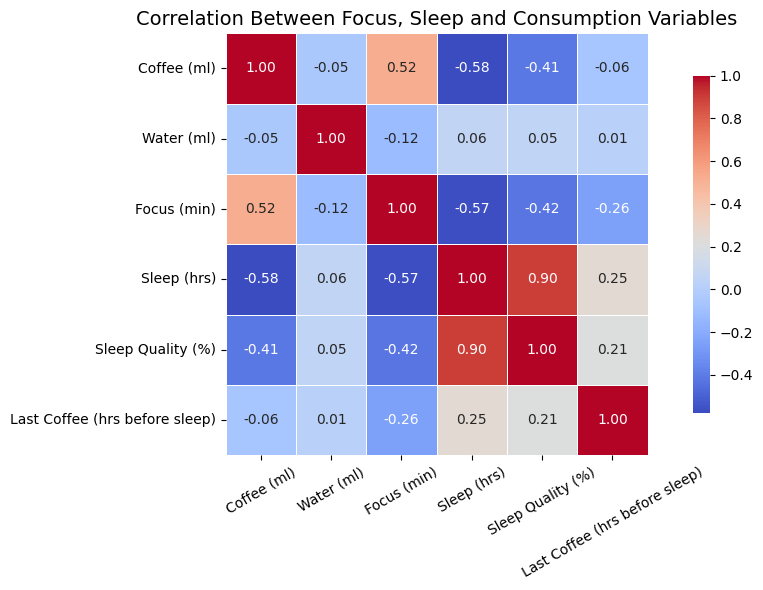

In [36]:
focus_cols = [
    "Coffee (ml)", "Water (ml)", "Focus (min)",
    "Sleep (hrs)", "Sleep Quality (%)",
    "Last Coffee (hrs before sleep)"
]

plt.figure(figsize=(10, 6))
sns.heatmap(df[focus_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": 0.8}, linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Between Focus, Sleep and Consumption Variables", fontsize=14)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Sleep Duration by Coffee Consumption

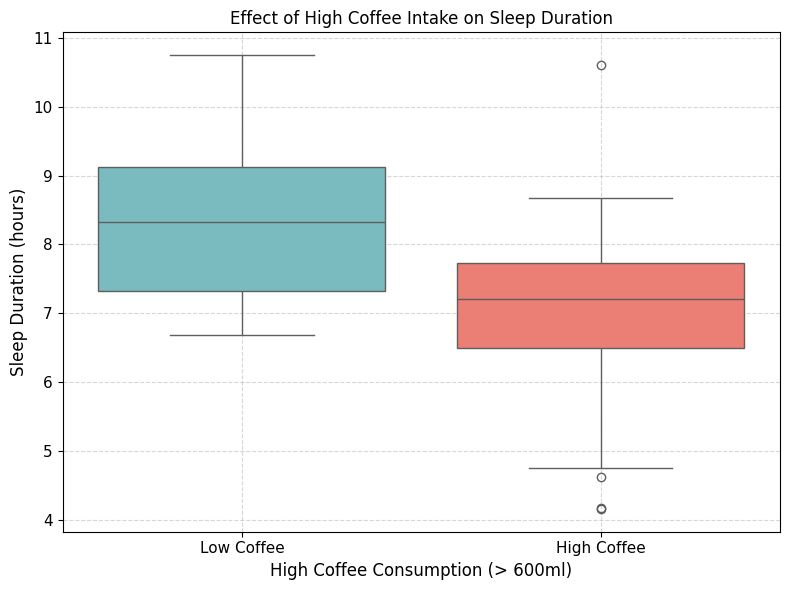

In [66]:
custom_palette = {"True" : "#FF6F61", "False" : "#6EC6CA"}

plt.figure(figsize=(8, 6))
sns.boxplot(
    x="High Coffee",
    y="Sleep (hrs)",
    data=df,
    palette=custom_palette
)

plt.title("Effect of High Coffee Intake on Sleep Duration")
plt.xlabel("High Coffee Consumption (> 600ml)", fontsize=12)
plt.ylabel("Sleep Duration (hours)", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks([0, 1], labels=["Low Coffee", "High Coffee"], fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## Focus Duration by Water Intake

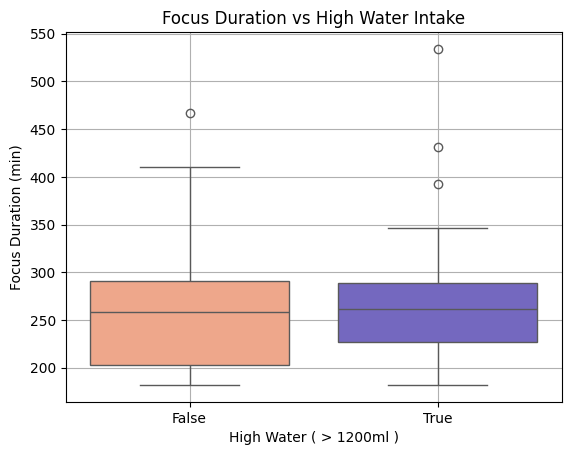

In [38]:
custom_palette = {"True" : "#6A5ACD", "False" : "#FFA07A"}

sns.boxplot(
    x="High Water",
    y="Focus (min)",
    data=df,
    palette=custom_palette
)
plt.title("Focus Duration vs High Water Intake")
plt.xlabel("High Water ( > 1200ml )")
plt.ylabel("Focus Duration (min)")
plt.grid(True)
plt.show()

## Boxplot for Focus Duration by High Sugar Intake

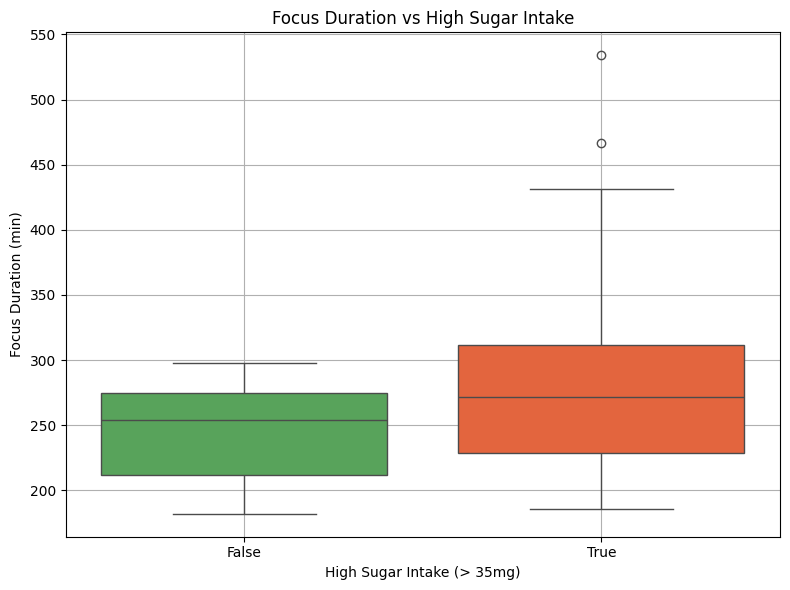

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Sugar (mg)"] > 35, y="Focus (min)", data=df, palette=["#4CAF50", "#FF5722"])
plt.title("Focus Duration vs High Sugar Intake")
plt.xlabel("High Sugar Intake (> 35mg)")
plt.ylabel("Focus Duration (min)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Strip Plot for Individual Focus Durations by Sugar Group

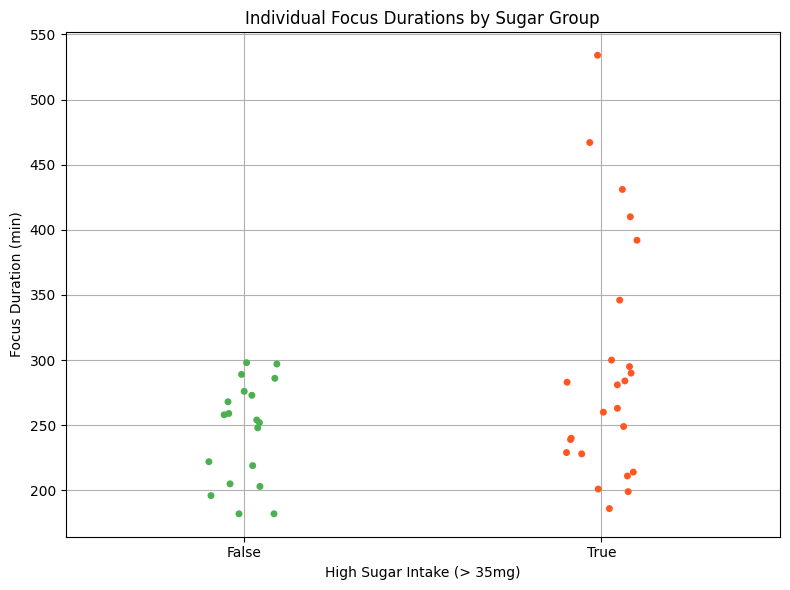

In [70]:
plt.figure(figsize=(8, 6))
sns.stripplot(x=df["Sugar (mg)"] > 35, y="Focus (min)", data=df, jitter=True, palette=["#4CAF50", "#FF5722"])
plt.title("Individual Focus Durations by Sugar Group")
plt.xlabel("High Sugar Intake (> 35mg)")
plt.ylabel("Focus Duration (min)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation Heatmap for Sugar Intake and Focus Duration

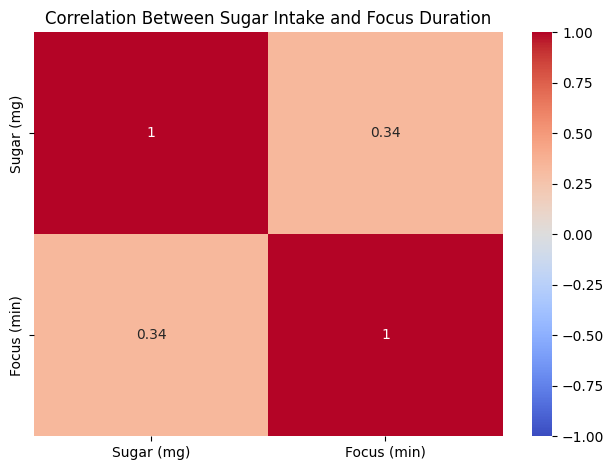

In [71]:
correlation_sugar_focus = df[['Sugar (mg)', 'Focus (min)']].corr()
sns.heatmap(correlation_sugar_focus, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Sugar Intake and Focus Duration")
plt.tight_layout()
plt.show()

## Histogram for Distribution of Focus Duration by Sugar Intake

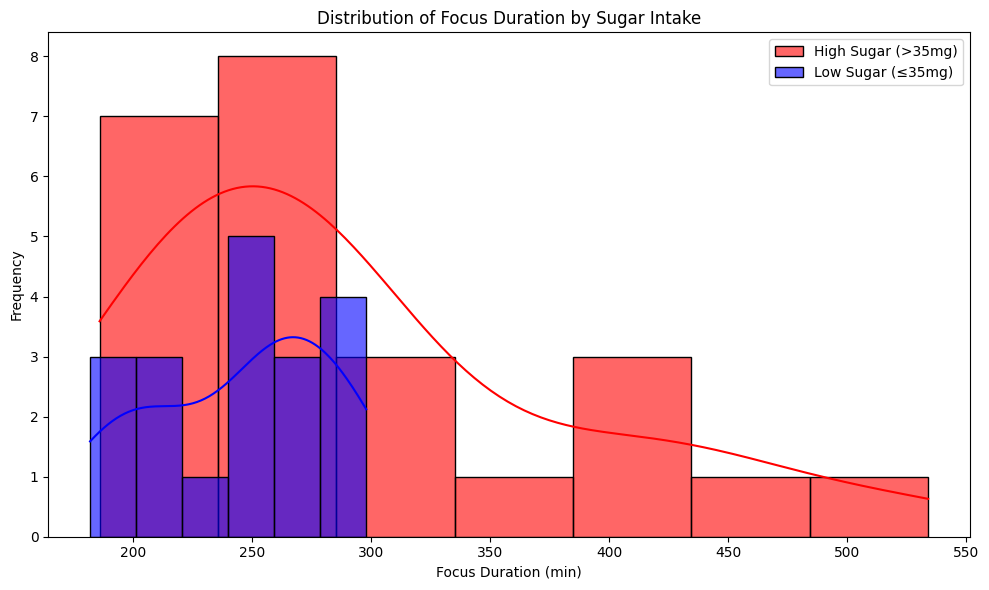

In [74]:
plt.figure(figsize=(10, 6))
high_sugar_focus = df[df["Sugar (mg)"] > 35]["Focus (min)"]
low_sugar_focus = df[df["Sugar (mg)"] <= 35]["Focus (min)"]
sns.histplot(high_sugar_focus, kde=True, color="red", label="High Sugar (>35mg)", alpha=0.6)
sns.histplot(low_sugar_focus, kde=True, color="blue", label="Low Sugar (≤35mg)", alpha=0.6)
plt.title("Distribution of Focus Duration by Sugar Intake")
plt.xlabel("Focus Duration (min)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# Hypothesis 1 — Does high coffee reduce sleep?

In [77]:
t_stat_c, p_val_c = ttest_ind(
    df[df['High Coffee']]['Sleep (hrs)'],
    df[~df['High Coffee']]['Sleep (hrs)'],
    equal_var=False)
print(f"Coffee vs Sleep Duration → T-Stat: {t_stat_c:.3f}, P-Value: {p_val_c:.3f}")

Coffee vs Sleep Duration → T-Stat: -3.304, P-Value: 0.002


# Hypothesis 2 — Does high water increase focus?

In [76]:
t_stat_w, p_val_w = ttest_ind(
    df[df['High Water']]['Focus (min)'],
    df[~df['High Water']]['Focus (min)'],
    equal_var=False)
print(f"Water vs Focus Duration → T-Stat: {t_stat_w:.3f}, P-Value: {p_val_w:.3f}")

Water vs Focus Duration → T-Stat: -0.094, P-Value: 0.926


## Hypothesis 3 — Does higher sugar intake negatively affect focus duration?

In [75]:
t_stat_sugar, p_val_sugar = ttest_ind(
    df[df["Sugar (mg)"] > 35]["Focus (min)"],
    df[df["Sugar (mg)"] <= 35]["Focus (min)"],
    equal_var=False
)
print(f"Sugar vs Focus → T-Stat: {t_stat_sugar:.3f}, P-Value: {p_val_sugar:.3f}")

Sugar vs Focus → T-Stat: 2.286, P-Value: 0.029


#  Conclusion

### Hypothesis 1 — High coffee intake reduces sleep duration

- **T-statistic** = -3.304
- **P-value** = 0.002
- 🔍 **Result**: This is statistically significant at the 0.05 level.
- **Interpretation**: On days when I consumed more than 600 ml of coffee, I slept significantly less than on low-coffee days.

---

### Hypothesis 2 — High water intake increases focus duration

- **T-statistic** = -0.094
- **P-value** = 0.926
- 🔍 **Result**: This is not statistically significant.
- **Interpretation**: Water consumption did not show a meaningful effect on focus duration in my self-tracked data.

---

### Hypothesis 3 — High sugar intake negatively affects focus duration

- **T-statistic** = 2.286  
- **P-value** = 0.029  
- 🔍 **Result**: This is statistically significant at the 0.05 level.  
- **Interpretation**: On days when I consumed higher amounts of sugar (>35 mg, mostly through coffee), my focus duration significantly decreased compared to low-sugar days. This suggests that excessive sugar intake might counteract the cognitive benefits typically associated with caffeine.

---

### Final Remarks

The findings underscore the complex interaction between dietary habits and cognitive performance. Specifically, consuming high amounts of coffee and sugar appears to have measurable negative impacts on sleep and focus, respectively.

Further studies could investigate the combined effect of caffeine and sugar, as well as potential thresholds for these effects. Increasing the tracking duration, adding more detailed dietary logging, and introducing physiological metrics (like heart rate or cortisol levels) could enhance the robustness of future analyses.